In [55]:
#visualização de RMSE no jupyter
library(ggplot2)
mal=as.data.frame(read.table("ESC/150-2100/grouped_mal.txt"))
kal=as.data.frame(read.table("ESC/150-2100/grouped_kal.txt"))
sti=as.data.frame(read.table("ESC/150-2100/grouped_sti.txt"))



names(mal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

func <- function(i){
    ob=c(i,i+40,i+80)
    
    return(ob)
}

#Tirando a média 
tamanhoGap= seq(150,2100,50) 

mediaKal=c()
mediaMal=c()
mediaSti=c()


sdKal=c()
sdMal=c()
sdSti=c()

varKal=c()
varMal=c()
varSti=c()

sdLacKal=c()
sdLacMal=c()
sdLacSti=c()

varLacKal=c()
varLacMal=c()
varLacSti=c()

mediaLacKal=c()
mediaLacMal=c()
mediaLacSti=c()

a=c()
for(z in seq(1,40,1)){
    for (i in seq(z,3600,120)){
        a=(func(i))
       #print(a)        
       # Calculando a média
        mediaLacKal=append(mediaLacKal, mean(kal$RMSE[a])) 
        mediaLacMal=append(mediaLacMal, mean(mal$RMSE[a])) 
        mediaLacSti=append(mediaLacSti, mean(sti$RMSE[a]))
        
        #calculando o desvio padrão
        sdLacKal=append(sdLacKal, sd(kal$RMSE[a])) 
        sdLacMal=append(sdLacMal, sd(mal$RMSE[a])) 
        sdLacSti=append(sdLacSti, sd(sti$RMSE[a])) 
        
        
        #calculando a variancia
        varLacKal=append(varLacKal, var(kal$RMSE[a])) 
        varLacMal=append(varLacMal, var(mal$RMSE[a])) 
        varLacSti=append(varLacSti, var(sti$RMSE[a])) 
        
        }
    }


for (i in seq(1,1200,30)) {
    #calculando a média
	mediaKal=append(mediaKal,(mean(mediaLacKal[i:(i+29)])))
	mediaMal=append(mediaMal,(mean(mediaLacMal[i:(i+29)])))
	mediaSti=append(mediaSti,(mean(mediaLacSti[i:(i+29)])))

    #calculando o devio padrão
	sdKal=append(sdKal,(mean(sdLacKal[i:(i+29)])))
	sdMal=append(sdMal,(mean(sdLacMal[i:(i+29)])))
	sdSti=append(sdSti,(mean(sdLacSti[i:(i+29)])))
    
        #calculando a variancia
	varKal=append(varKal,(mean(varLacKal[i:(i+29)])))
	varMal=append(varMal,(mean(varLacMal[i:(i+29)])))
	varSti=append(varSti,(mean(varLacSti[i:(i+29)])))


}


mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$var=varKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"

mediaMal=as.data.frame(mediaMal)
names(mediaMal)=c("media")
mediaMal$sd=sdMal
mediaMal$var=varMal
mediaMal$tamanho=tamanhoGap
mediaMal$algoritmo="Moving Average"


mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$var=varSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

todos=rbind(mediaKal,mediaMal, mediaSti)


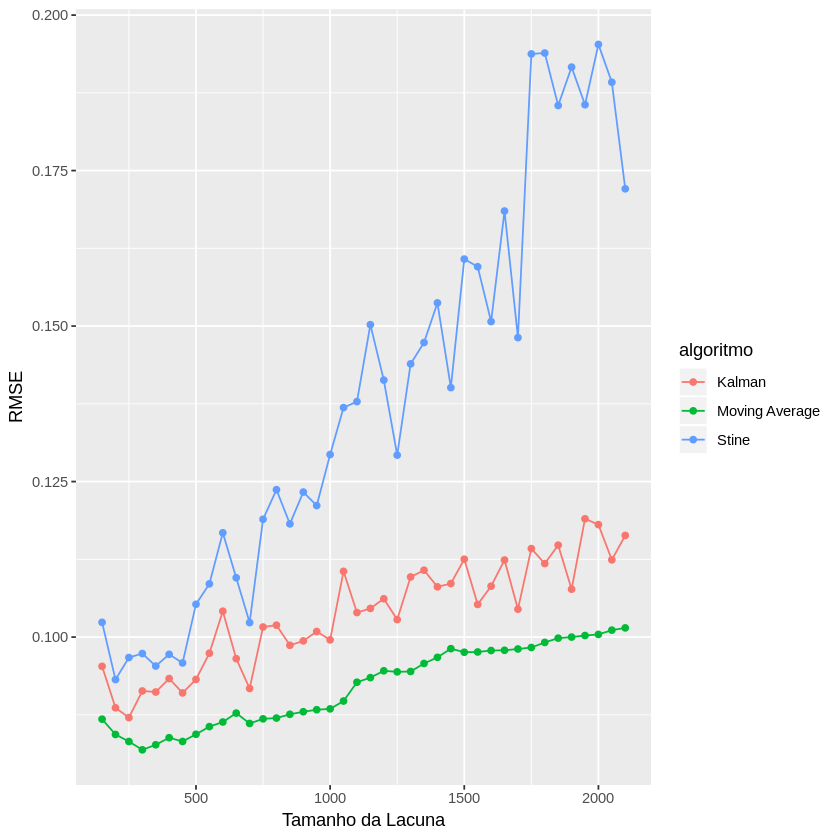

In [56]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")


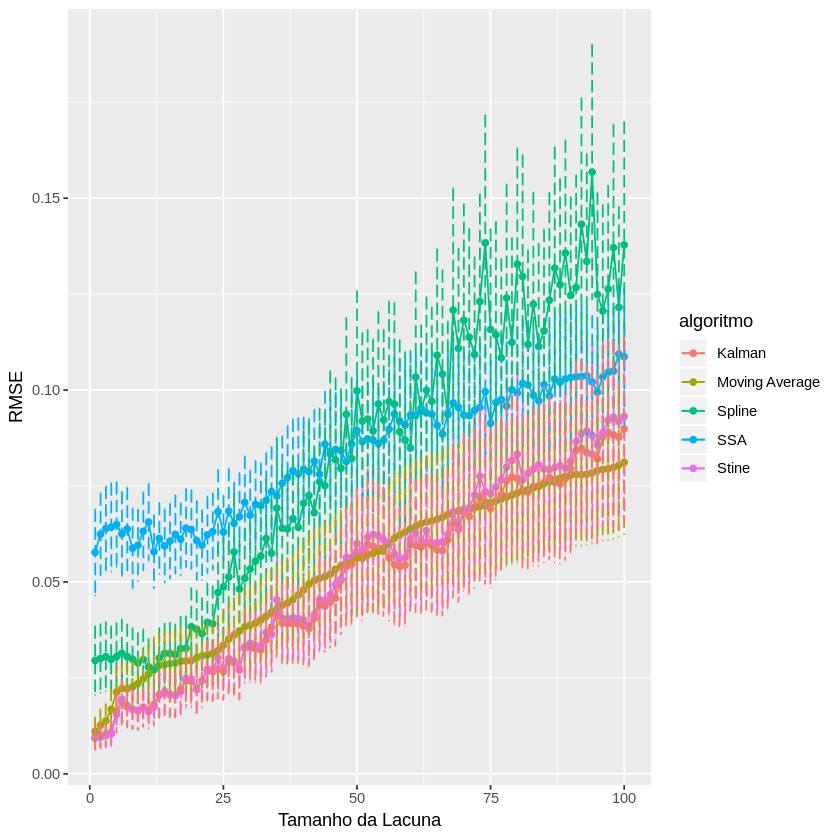

In [38]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


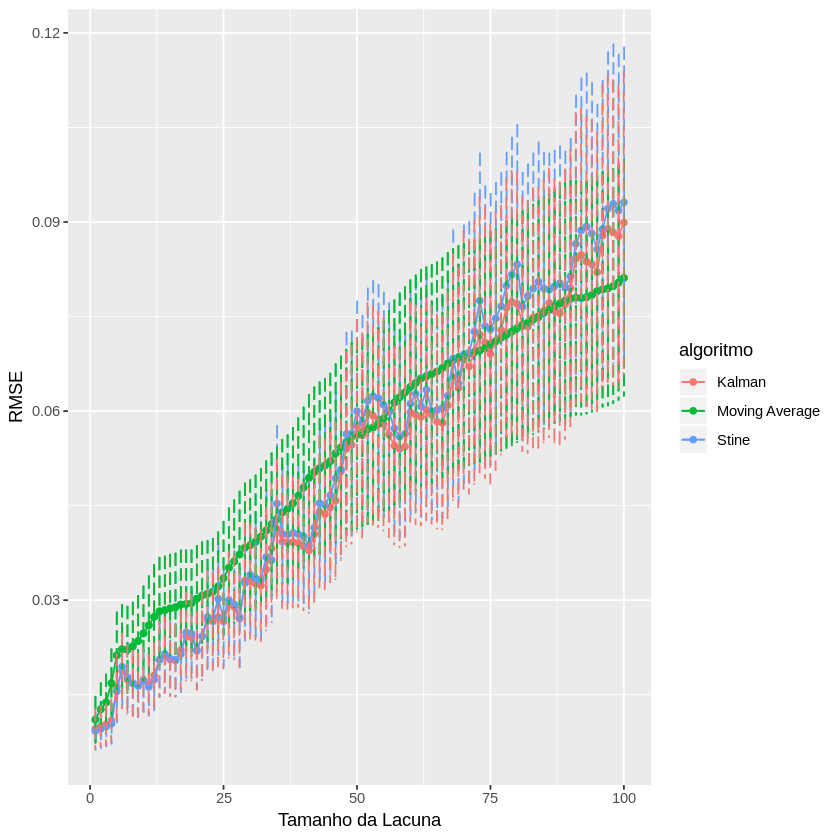

In [15]:

ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


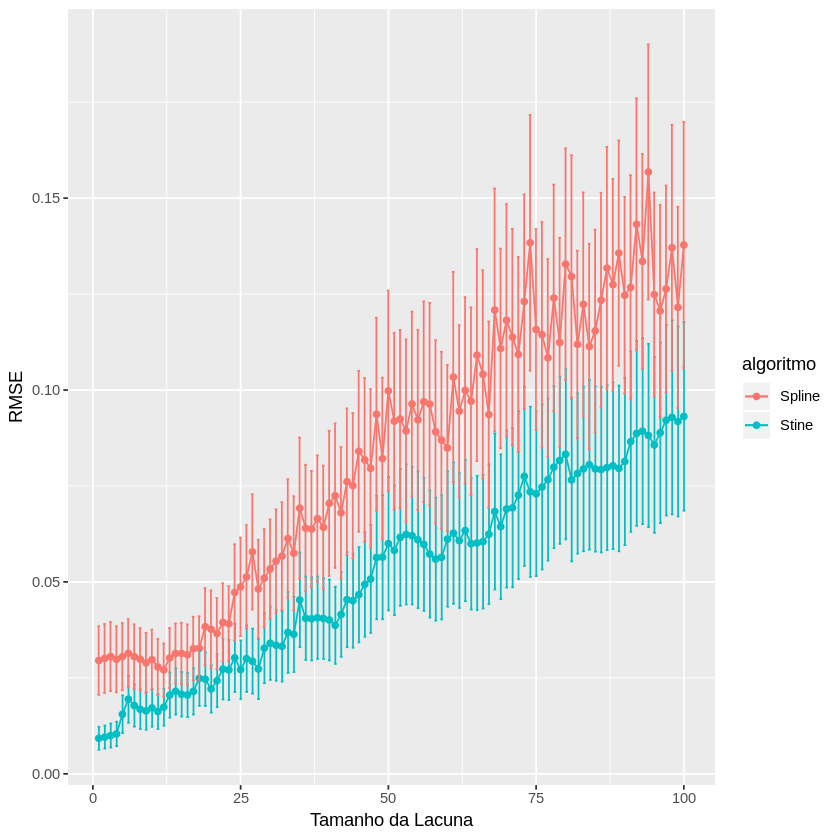

In [16]:
ggplot(todos[which(todos$algoritmo=="Stine" | todos$algoritmo=="Spline" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


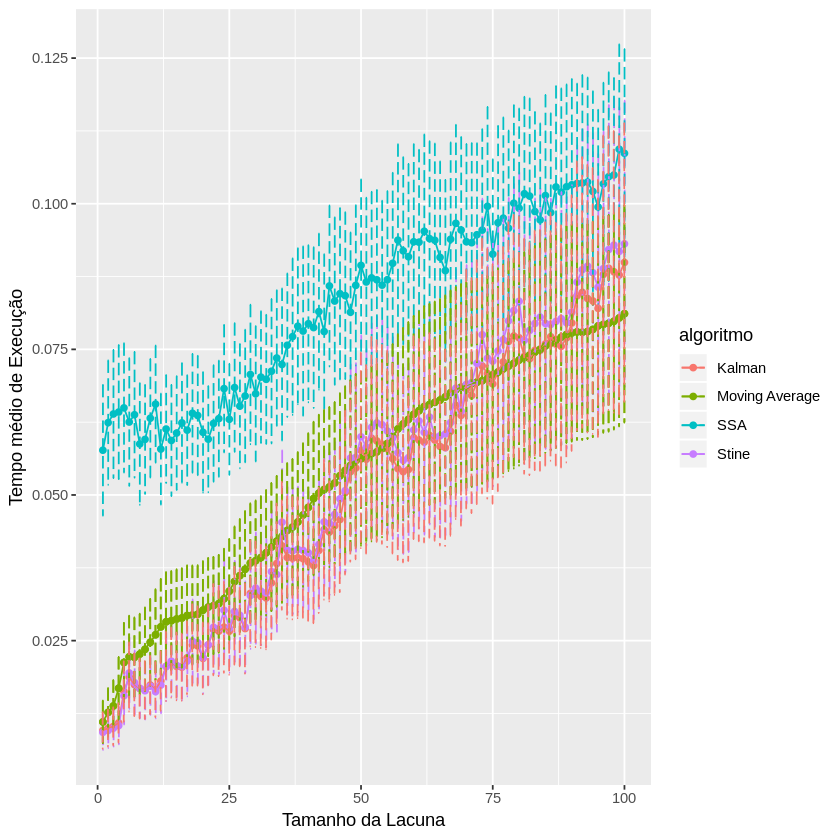

In [18]:
ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" | todos$algoritmo=="SSA" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11, position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


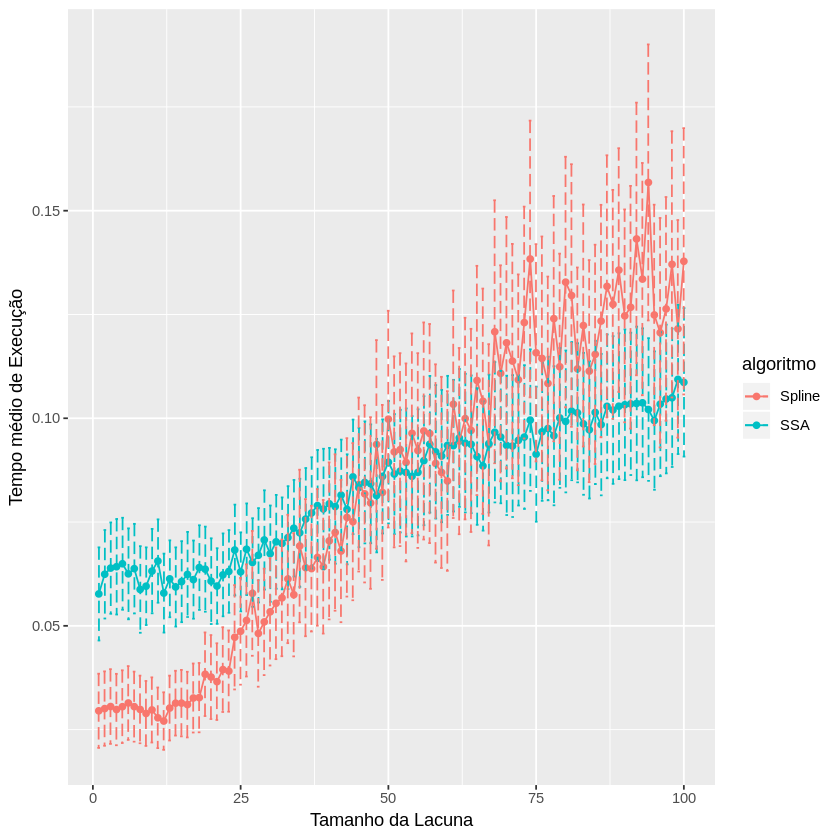

In [20]:
ggplot(todos[which(todos$algoritmo=="Spline" | todos$algoritmo=="SSA" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11, position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


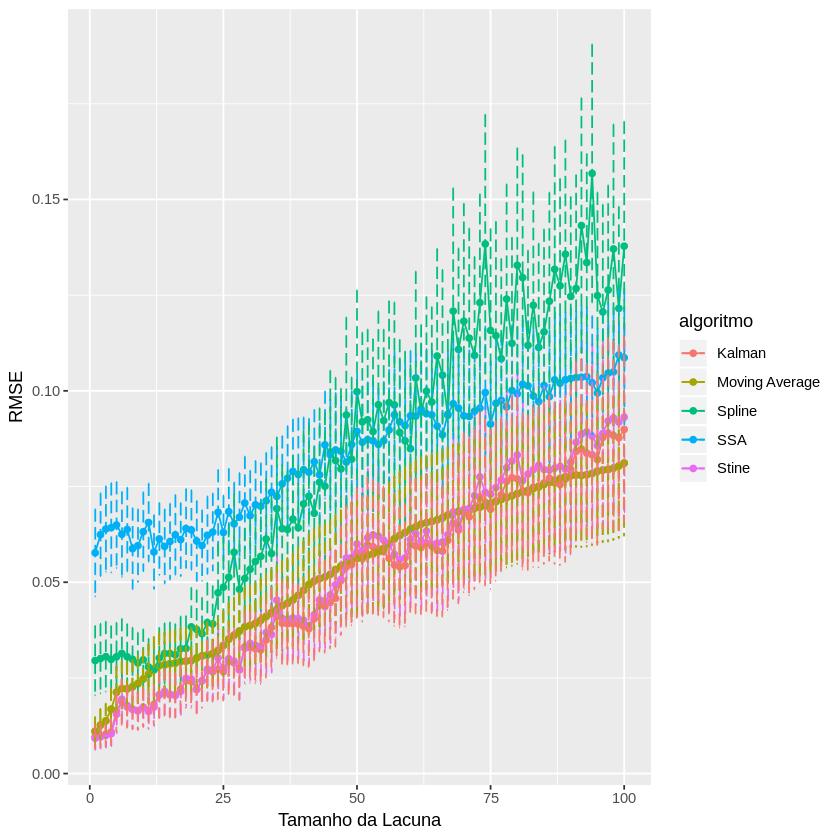

In [31]:
n=90 
s=todos$sd
SE=s/sqrt(n)
error=qt(.975, df=n-1)*SE
todos$error=error

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")

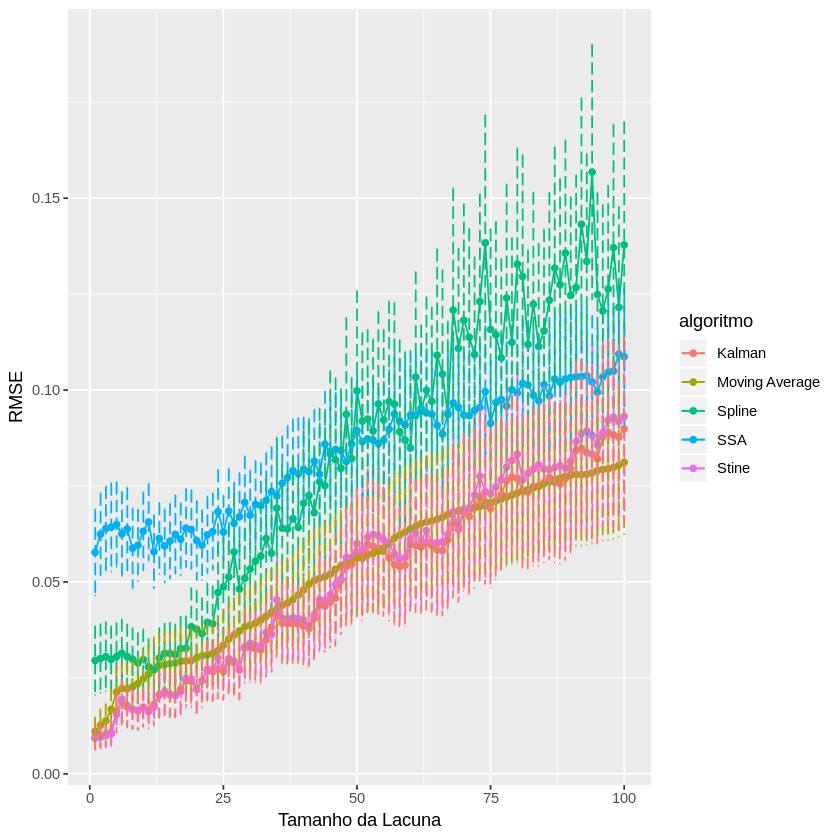

In [57]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


In [56]:
n=90
t.ic<- todos$media[1] +  qt(c(0.025, 0.975), df = n-1) * sqrt(todos$var[1]/n)
t.ic
todos$media[1]


[1] 0.0005335275 0.0186181897

[1] 0.009575859

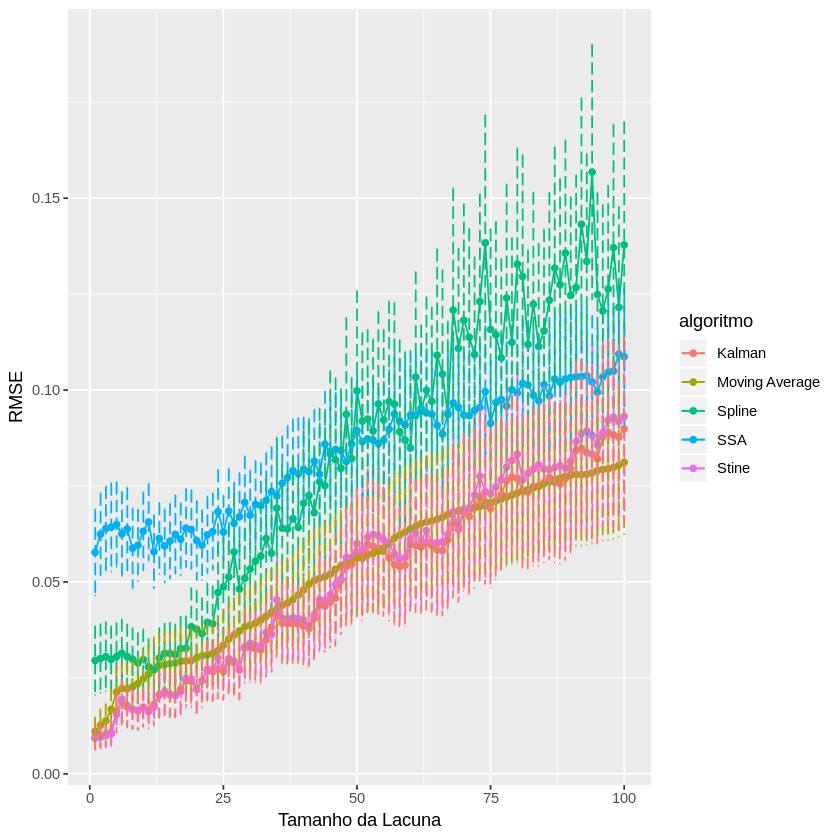

In [72]:
n=90
sigma=todos$sd  # population standard deviation
sem = sigma/sqrt(n)     # standard error of the mean 
error = qnorm(.975)*sem         # margin of error 
todos$error=error
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


In [39]:
t=as.data.frame(read.table("rmse.txt"))
#t
a=c()
x=c()
mediaLacKal=c()
mediaKal=c()
for(z in seq(1,40,1)){
    for (i in seq(z,3600,120)){
        a=(func(i))
      # Calculando a média
        }
    }

for(i in seq (1,3600,30)){
        # Calculando a média
        mediaLacKal=append(mediaLacKal, mean(t$x[a])) 
        }


for (i in seq(1,120,4)) {
    #calculando a média
	mediaKal=append(mediaKal,(mean(mediaLacKal[i:(i+29)])))
}

mediaKal

[1] 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654
 [7] 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654
[13] 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654
[19] 0.07454654 0.07454654 0.07454654 0.07454654 0.07454654         NA
[25]         NA         NA         NA         NA         NA         NA